In [1]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Importing data from CSV as panda dataframe

In [16]:
df = pd.read_csv("data/raw.csv")

## Exploring dataset

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1001 non-null   str  
 1   race_ethnicity               1001 non-null   str  
 2   parental_level_of_education  1001 non-null   str  
 3   lunch                        1001 non-null   str  
 4   test_preparation_course      1001 non-null   str  
 5   math_score                   1001 non-null   int64
 6   reading_score                1001 non-null   int64
 7   writing_score                1001 non-null   int64
dtypes: int64(3), str(5)
memory usage: 62.7 KB


In [22]:
print("Categories in parental_level_of_education ",set(df["parental_level_of_education"]))
print("Categories in lunch ",set(df["lunch"]))
print("Categories in test_preparation_course ",set(df["test_preparation_course"]))
print("Categories in race_ethnicity ",set(df["race_ethnicity"]))
print("Categories in gender ",set(df["gender"]))


Categories in parental_level_of_education  {'high school', "bachelor's degree", 'some college', 'some high school', "master's degree", "associate's degree"}
Categories in lunch  {'free/reduced', 'standard'}
Categories in test_preparation_course  {'completed', 'none'}
Categories in race_ethnicity  {'group C', 'group D', 'group B', 'group E', 'group A'}
Categories in gender  {'female', 'male'}


In [11]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [17]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [18]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.drop_duplicates(inplace=True)

In [19]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   str  
 1   race_ethnicity               1000 non-null   str  
 2   parental_level_of_education  1000 non-null   str  
 3   lunch                        1000 non-null   str  
 4   test_preparation_course      1000 non-null   str  
 5   math_score                   1000 non-null   int64
 6   reading_score                1000 non-null   int64
 7   writing_score                1000 non-null   int64
dtypes: int64(3), str(5)
memory usage: 62.6 KB


In [20]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [21]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Splitting the categorical and numerical features

In [25]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'str']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'str']

print(f"We have {len(numerical_features)} numerical feature : {numerical_features}")
print(f"We have {len(categorical_features)} categorical feature : {categorical_features}")

We have 3 numerical feature : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical feature : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### Adding additional columns

In [27]:
df["total_score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["average"] = df["total_score"] / 3
print(df.head())

   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total_score    average  
0          218  72.666667  
1          247  82.333333  
2          278  92.666667  
3          148  49.333333  
4          2

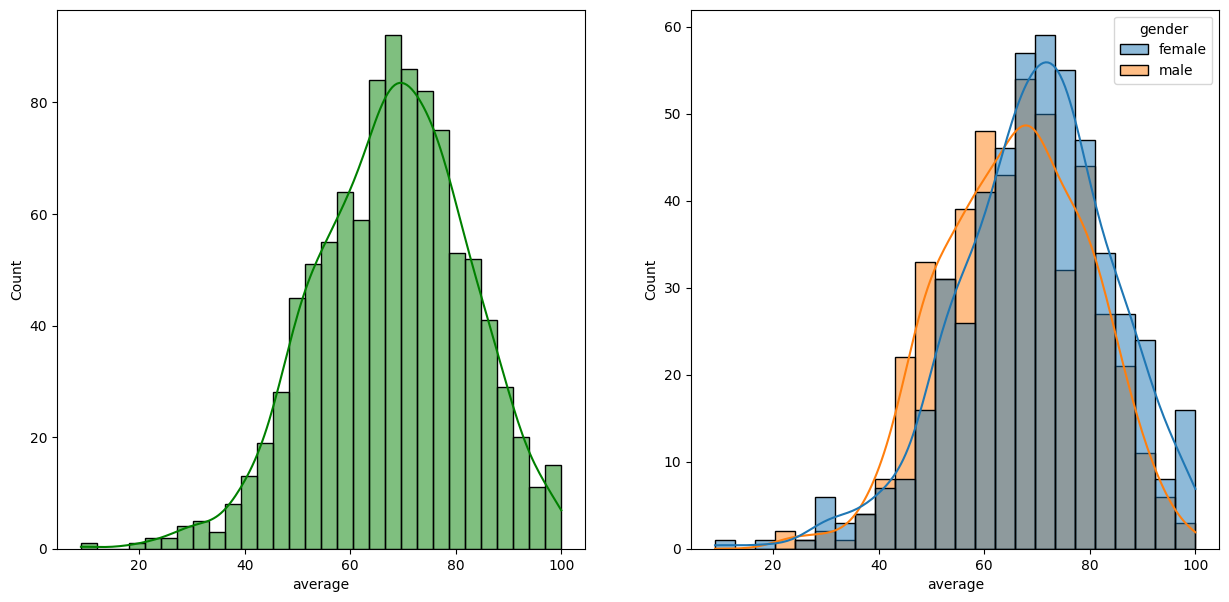

In [29]:
fig_axs = plt.subplots(1,2, figsize = (15,7))

plt.subplot(1,2,1)
seaborn.histplot(data=df, x="average", bins=30, kde=True, color="g")
plt.subplot(1,2,2)
seaborn.histplot(data=df,x="average", kde=True, hue="gender")
plt.show()


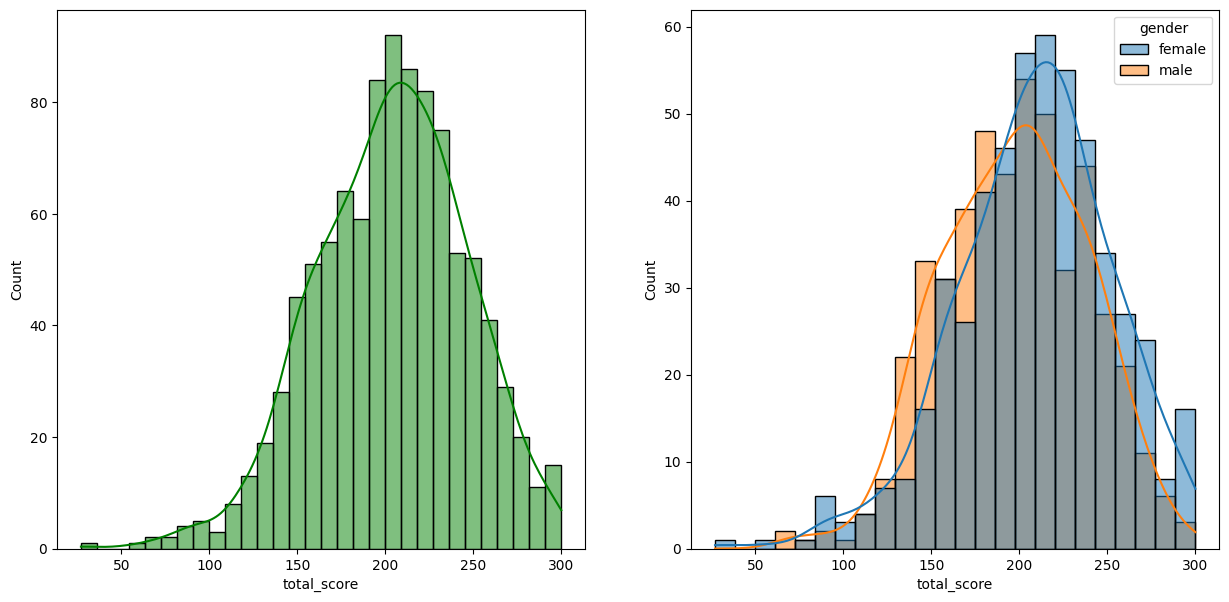

In [30]:
fig_axs = plt.subplots(1,2, figsize = (15,7))

plt.subplot(1,2,1)
seaborn.histplot(data=df, x="total_score", bins=30, kde=True, color="g")
plt.subplot(1,2,2)
seaborn.histplot(data=df,x="total_score", kde=True, hue="gender")
plt.show()

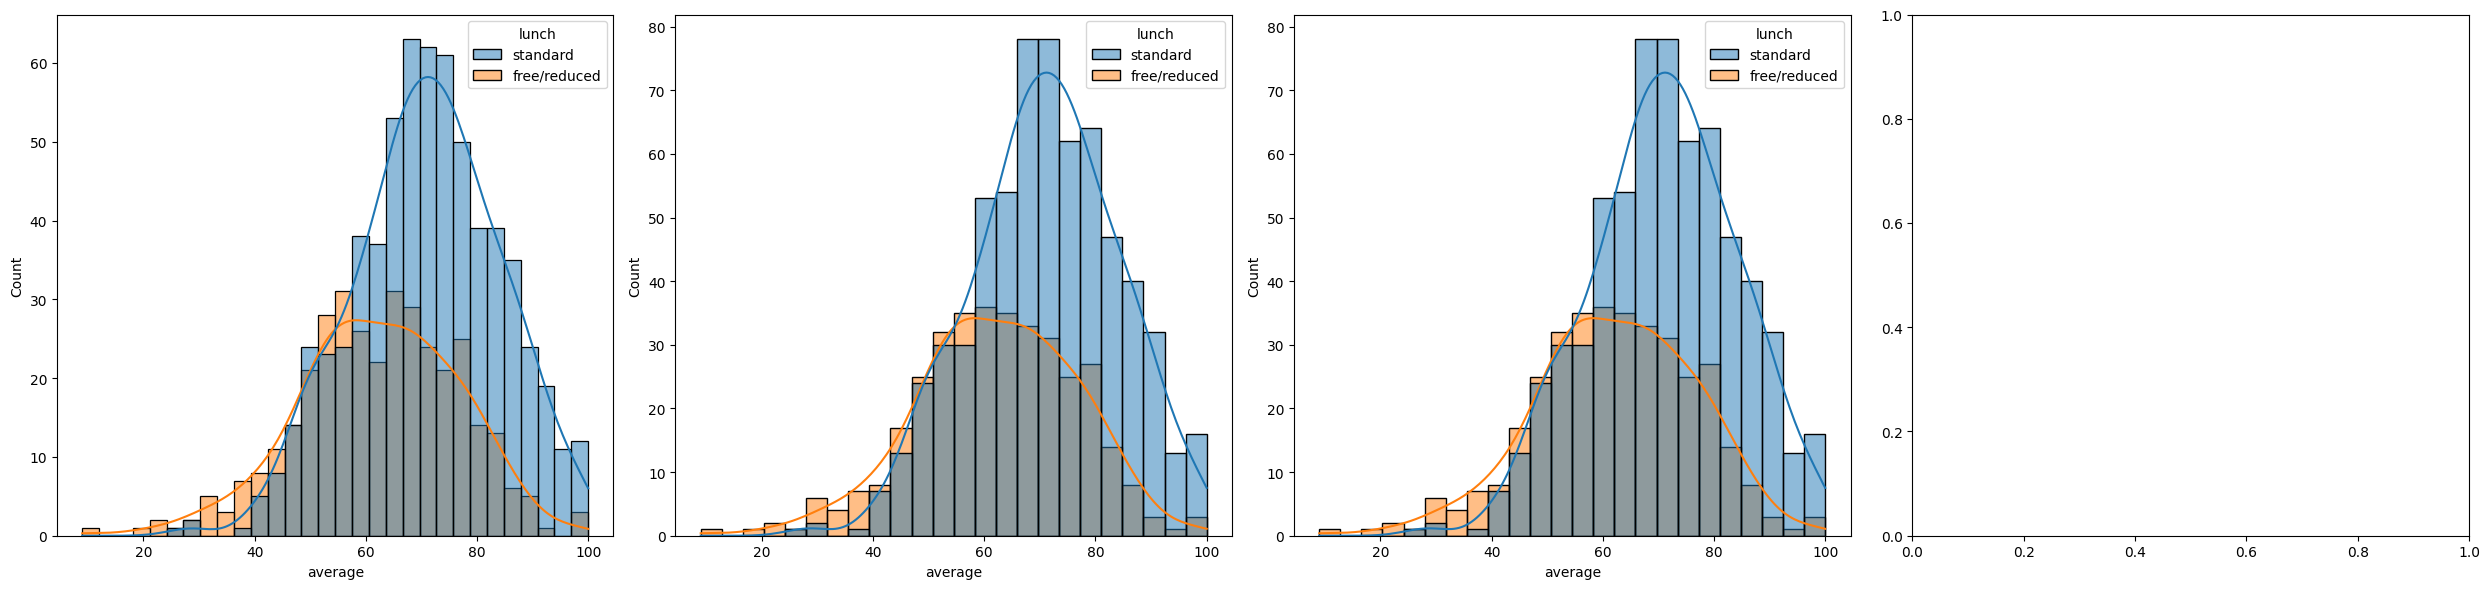

In [ ]:
fig_axs = plt.subplots(1,3, figsize = (25,6))

plt.subplot(1,4,1)
seaborn.histplot(data=df, x="average", bins=30, kde=True, hue="lunch")
plt.subplot(1,4,2)
seaborn.histplot(data=df,x="average", kde=True, hue="lunch")
plt.subplot(1,4,3)
seaborn.histplot(data=df,x="average", kde=True, hue="lunch")
plt.tight_layout()
plt.show()